# Линейная регрессия с использованием Lasagne

In [143]:
import lasagne
import theano

import matplotlib.pyplot as plt
import numpy as np
import theano.tensor as T

In [144]:
%matplotlib inline

## Конструирование нейросети

In [145]:
def build_model(learning_rate=0.00001):
    X = T.dmatrix('X')
    y = T.dvector('y')
    
    in_layer = lasagne.layers.InputLayer(shape=(None, 1), input_var=X)
    out_layer = lasagne.layers.DenseLayer(in_layer, 1,
                                          nonlinearity=lasagne.nonlinearities.linear,
                                          b=None)
    
    predicted_y = T.flatten(lasagne.layers.get_output(out_layer, X))
    
    params = lasagne.layers.get_all_params(out_layer, trainable=True)
    
    loss = lasagne.objectives.aggregate(lasagne.objectives.squared_error(predicted_y, y))
    acc = T.mean(T.eq(predicted_y, y))
    
    cost = T.grad(loss, params)
    
    updates = lasagne.updates.sgd(cost, params, learning_rate=learning_rate)
    
    f_train = theano.function([X, y], [loss, acc], updates=updates)
    f_pred = theano.function([X], predicted_y)
    
    return f_train, f_pred

## Подготовка исходных данных и создание нейросети

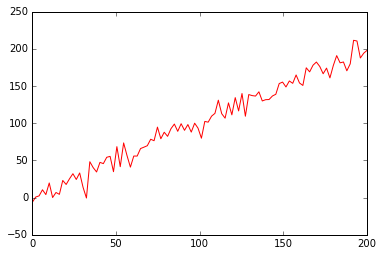

In [146]:
# Количество точек
space_dim = 100
# Границы рандома
min_value, max_value = 0, 200

X_train = np.linspace(min_value, max_value, space_dim).reshape(space_dim, 1)
y_train = X_train[:, 0] + 10 * np.random.randn(space_dim)

plt.plot(X_train, y_train, c='r')
plt.show()

train_f, pred_f = build_model()

## Обучение модели

3883.0552041133346 0.0
2124.7723678333573 0.0
1182.677060201609 0.0
677.8982189390997 0.0
407.4355837167015 0.0
262.52041770622293 0.0
184.8742617151606 0.0
143.27116648459497 0.0
120.98006688341704 0.0
109.03637467279988 0.0
102.63690922634358 0.0
99.2080565080625 0.0
97.37086226606458 0.0
96.38647289670067 0.0
95.85904317401024 0.0
95.5764362734296 0.0
95.42501539364237 0.0
95.34388870773843 0.0
95.30041979641128 0.0
95.27712468894315 0.0


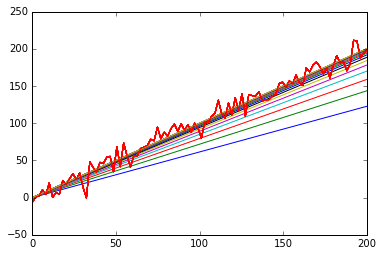

In [147]:
n_eras = 20

train_loss = list()

for era_number in range(n_eras):
    loss, acc = train_f(X_train, y_train)
    
    print(loss, acc)
    
    train_loss.append(loss)
    
    plt.plot(X_train, pred_f(X_train))
    plt.plot(X_train, y_train, c='r')

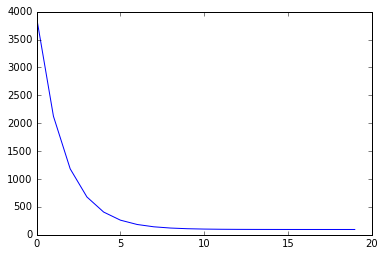

In [148]:
if train_loss:
    plt.plot(range(len(train_loss)), train_loss)